In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({
          'font.size': 20,
          'figure.figsize': (16, 9),
          'axes.grid': False,
          'grid.linestyle': '-',
          'grid.alpha': 0.2,
          'lines.markersize': 5.0,
          'xtick.minor.visible': True,
          'xtick.direction': 'in',
          'xtick.major.size': 10.0,
          'xtick.minor.size': 5.0,
          'xtick.top': True,
          'ytick.minor.visible': True,
          'ytick.direction': 'in',
          'ytick.major.size': 10.0,
          'ytick.minor.size': 5.0,
          'ytick.right': True,
          'errorbar.capsize': 0.0,
          'figure.max_open_warning': 50,
})

In [2]:
from __init__ import * 

In [3]:
import yaml

In [4]:
from PIL import Image

In [5]:
crystal = 'BGO'
beam = 'e'
beam_text = r'$e^+$' if beam == 'e' else r'$\mu^+$'

In [6]:
with open('yaml/data.yaml', 'r') as file:
    runs_info = yaml.safe_load(file)

In [7]:
angles = runs_info[crystal][beam].keys()

In [11]:
ch = 2

In [12]:
laser = True

In [13]:
name_piece = 'Hardware' if not laser else 'fromLaser'

In [15]:
df = {}
df[1] = {}
df[2] = {}


for ch in [2]:
    for angle in angles: 
        if angle == 110 or angle == 130: 
            continue
        df[ch][angle] = pd.read_parquet(f'Hardware_Fit/parqs/FitInfo_{name_piece}_{crystal}_{beam}_{angle}_Ch{ch}.parq')
        df[ch][angle]['c_over_s'] = df[ch][angle]['c'] / df[ch][angle]['s']
        df[ch][angle]['c_over_s_err'] = df[ch][angle]['c_over_s'] * np.sqrt((df[ch][angle]['errc'] / df[ch][angle]['c'])**2 + (df[ch][angle]['errs'] / df[ch][angle]['s'])**2)

In [16]:
for ch in [1]:
    for angle in [0, 20, 40, 50]: 
        if angle == 110 or angle == 130: 
            continue
        df[ch][angle] = pd.read_parquet(f'Hardware_Fit/parqs/FitInfo_{name_piece}_{crystal}_{beam}_{angle}_Ch{ch}.parq')
        df[ch][angle]['c_over_s'] = df[ch][angle]['c'] / df[ch][angle]['s']
        df[ch][angle]['c_over_s_err'] = df[ch][angle]['c_over_s'] * np.sqrt((df[ch][angle]['errc'] / df[ch][angle]['c'])**2 + (df[ch][angle]['errs'] / df[ch][angle]['s'])**2)

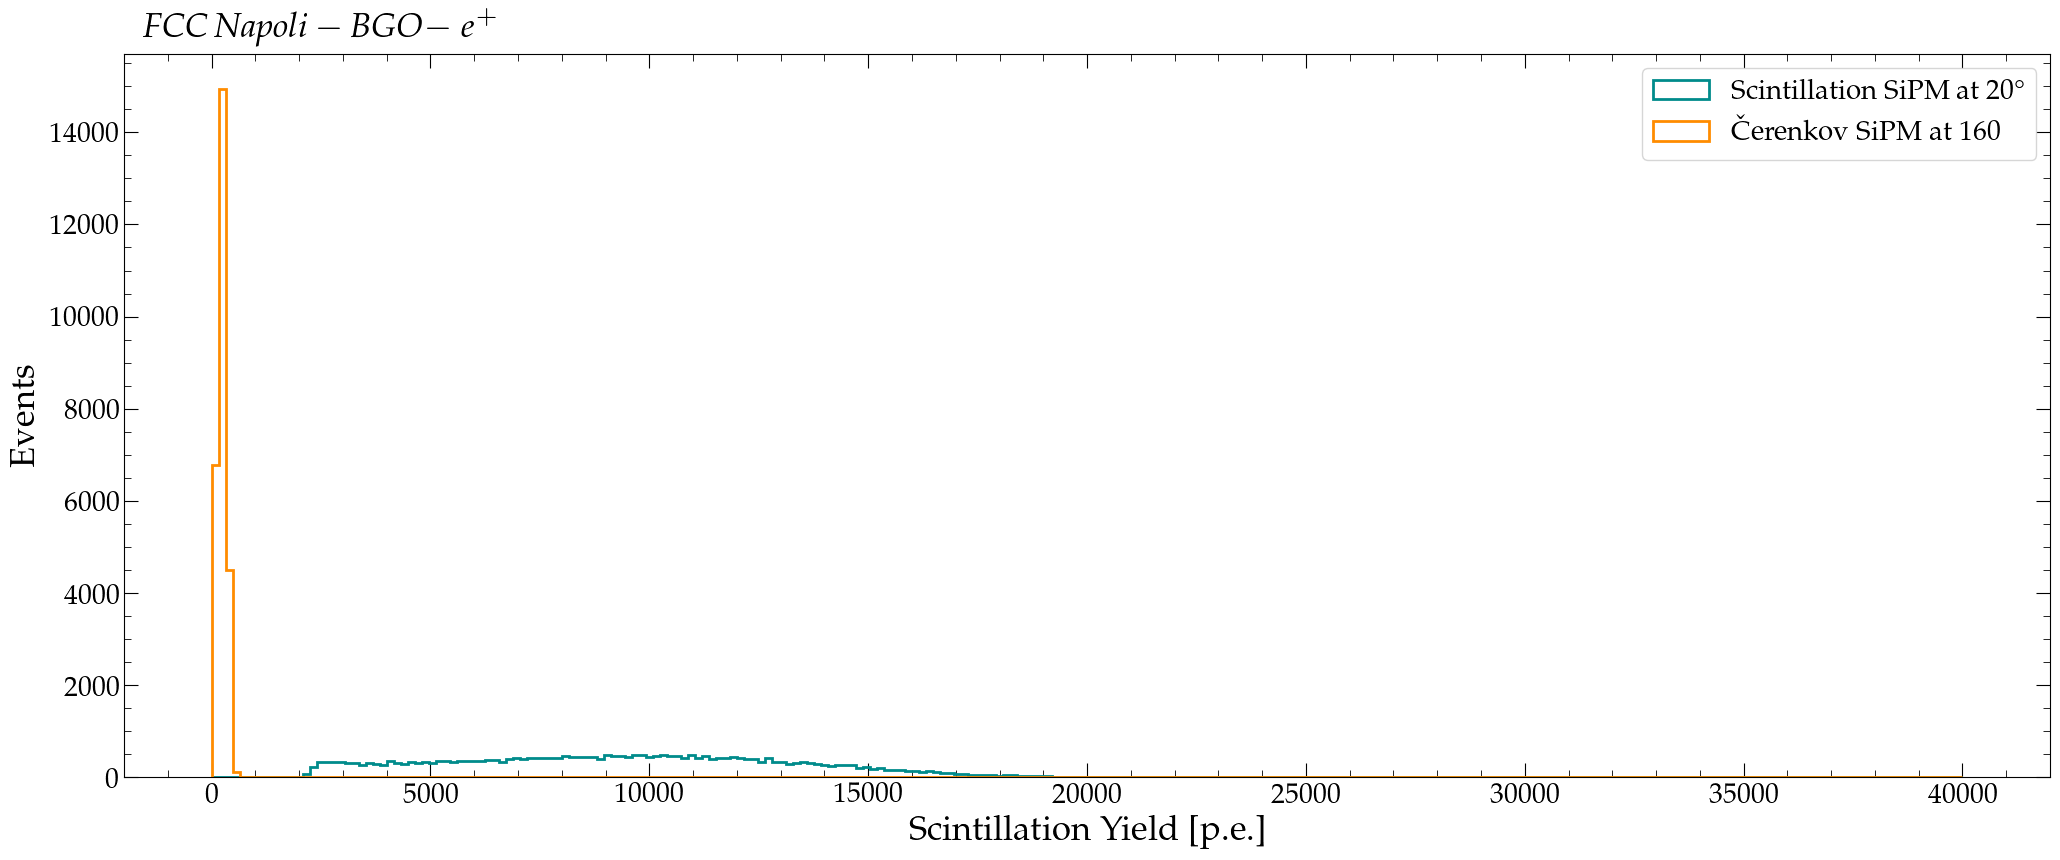

In [26]:
ch = 1
title = "Scintillation Channel" if ch == 1 else "Čerenkov channel"
custom_plot_layout(title=f'', xlabel="Scintillation Yield [p.e.]", ylabel="Events",  figsize=(21, 9), crystal = crystal, beam = beam_text)
plt.hist(df[1][20]['s'], bins = 250, range = (0, 40000), color = 'darkcyan', histtype = 'step', linewidth = 2, label = "Scintillation SiPM at 20°")
plt.hist(df[2][160]['s'], bins = 250, range = (0, 40000), color = 'darkorange', histtype = 'step', linewidth = 2, label = "Čerenkov SiPM at 160")
plt.legend()
plt.draw()
fig = plt.gcf()
fig.canvas.draw()
plt.tight_layout()

/tmp/ggaudino/ipykernel_3762614/1607849599.py:10: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
/tmp/ggaudino/ipykernel_3762614/1607849599.py:10: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


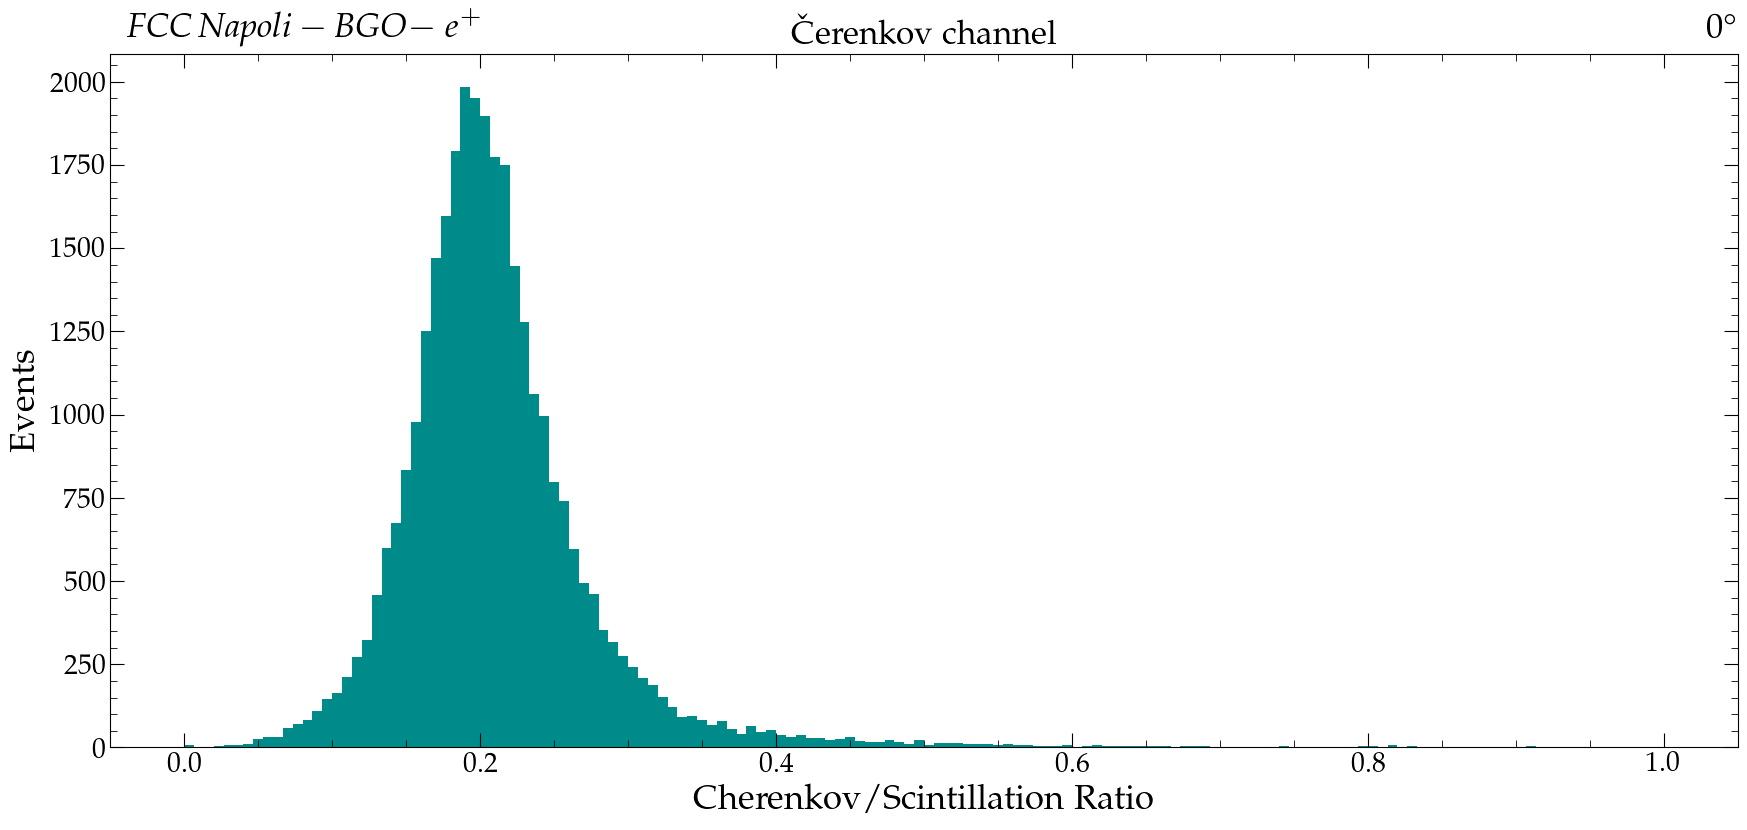

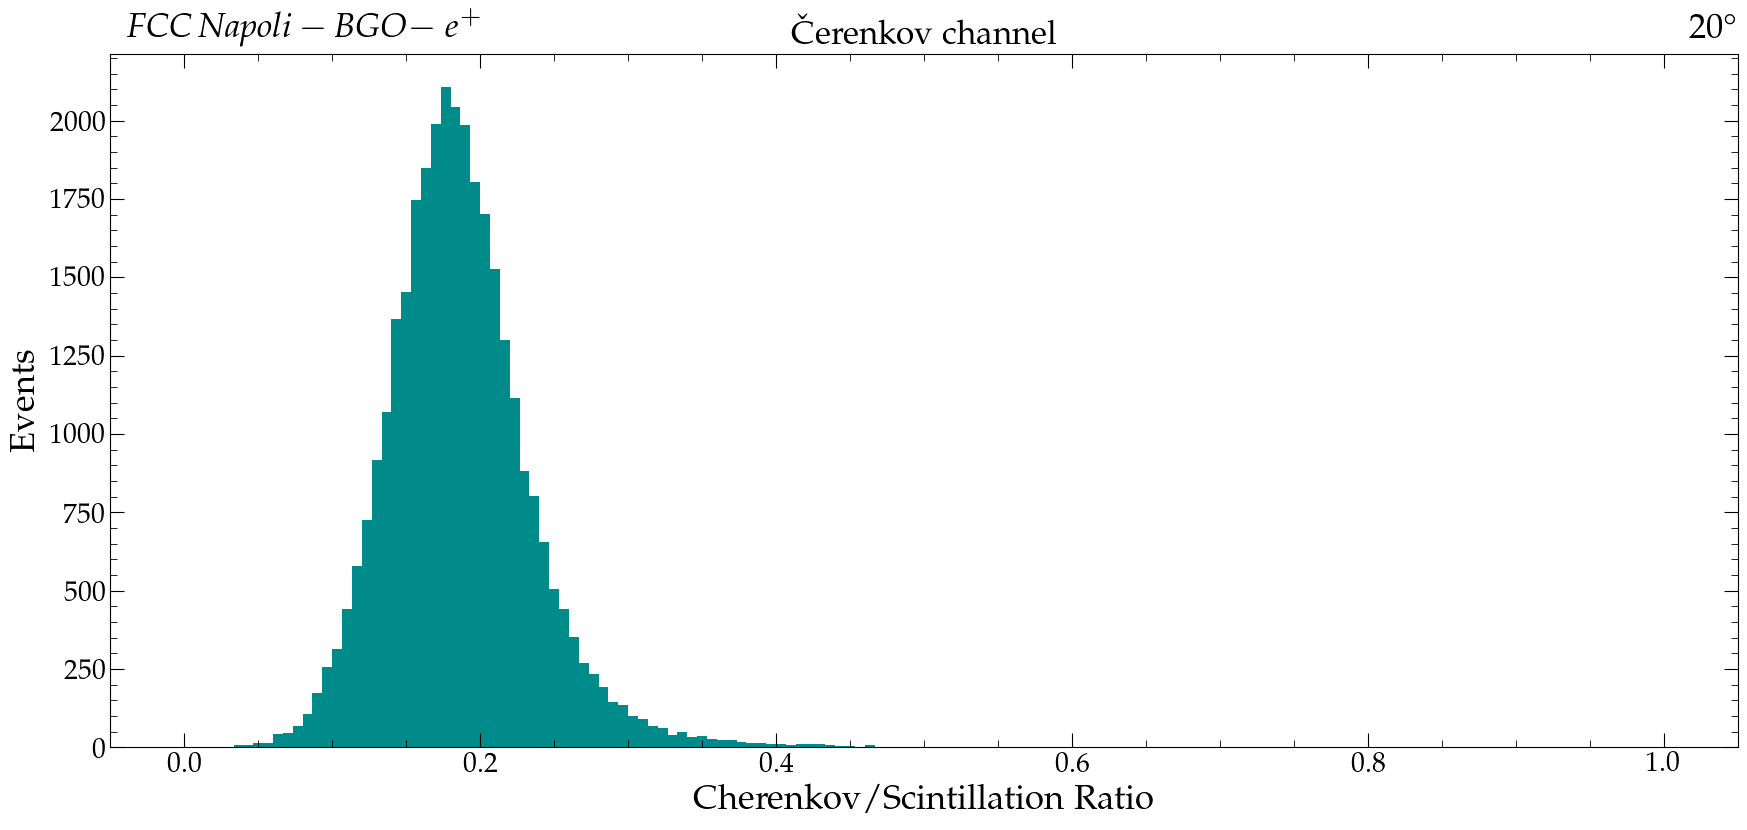

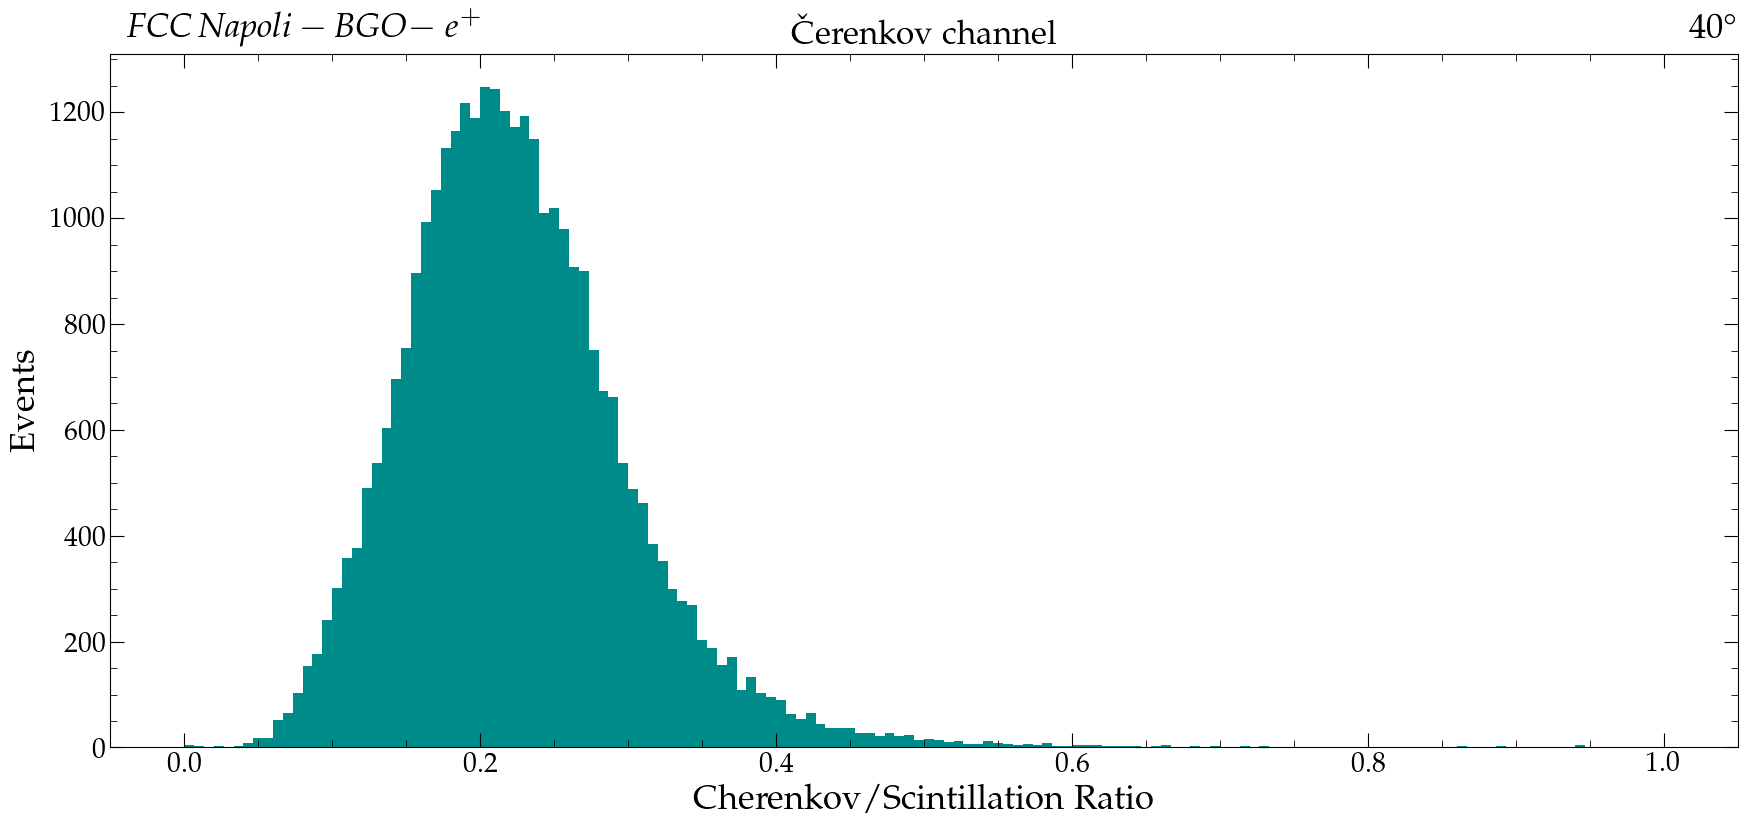

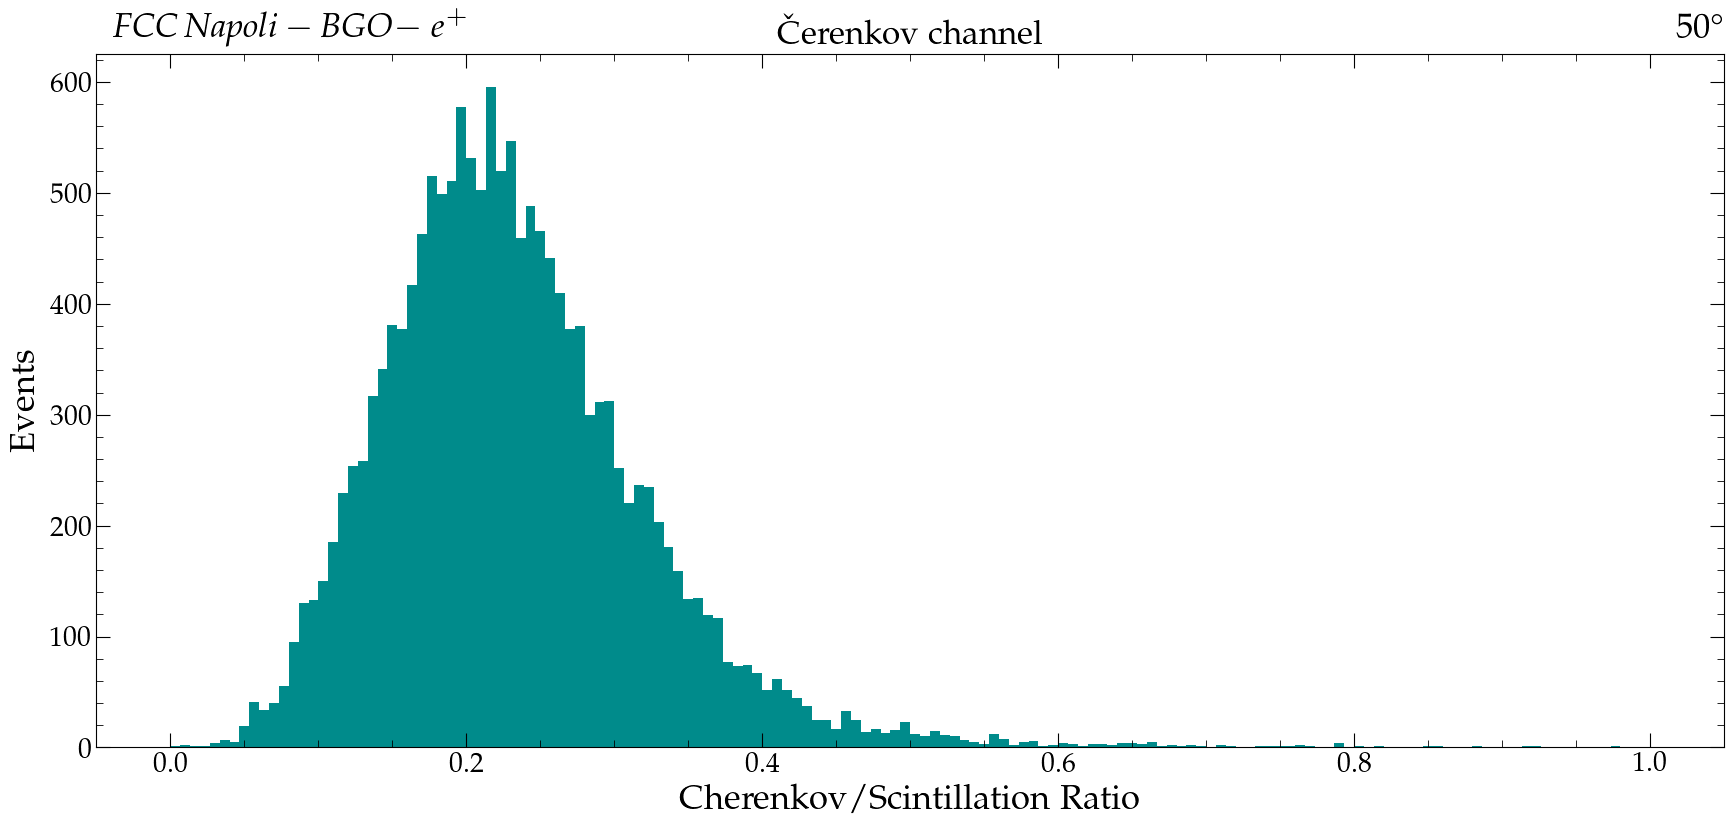

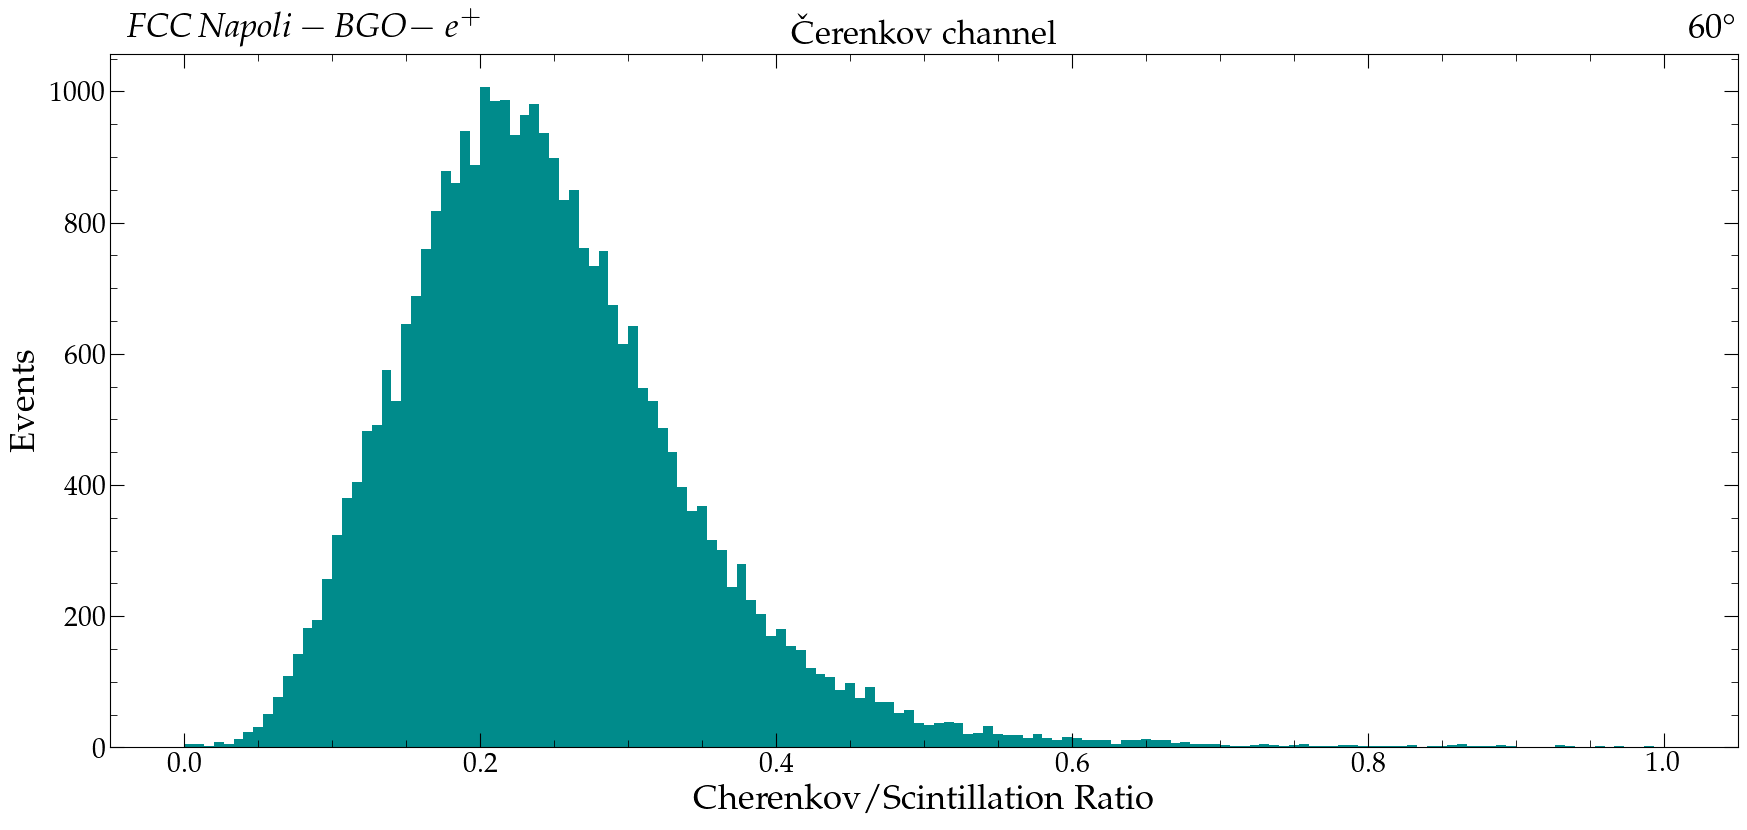

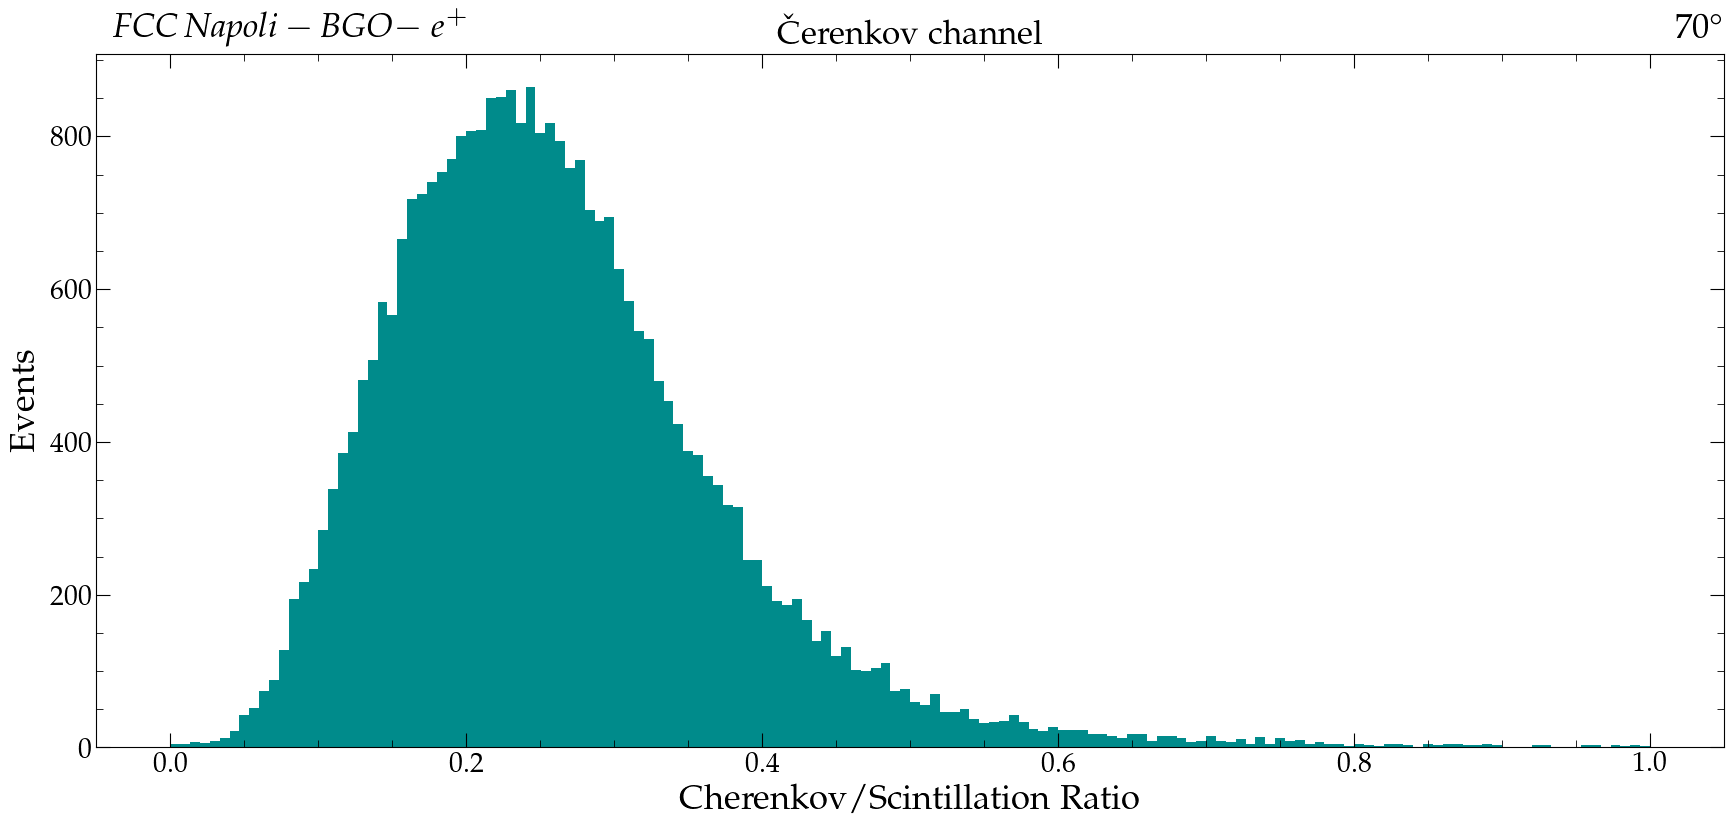

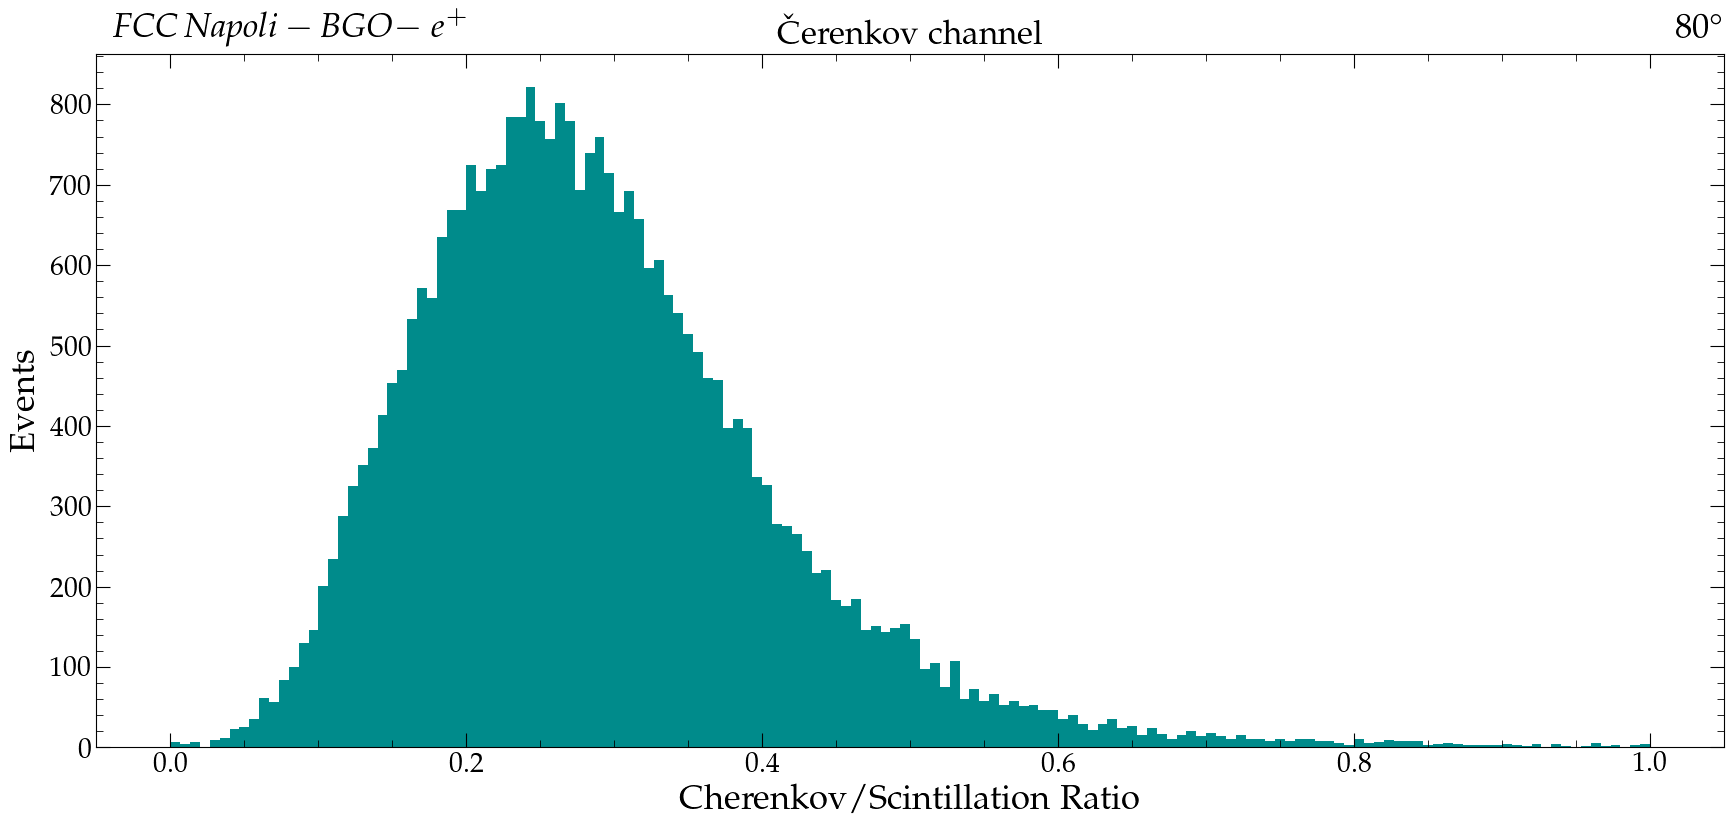

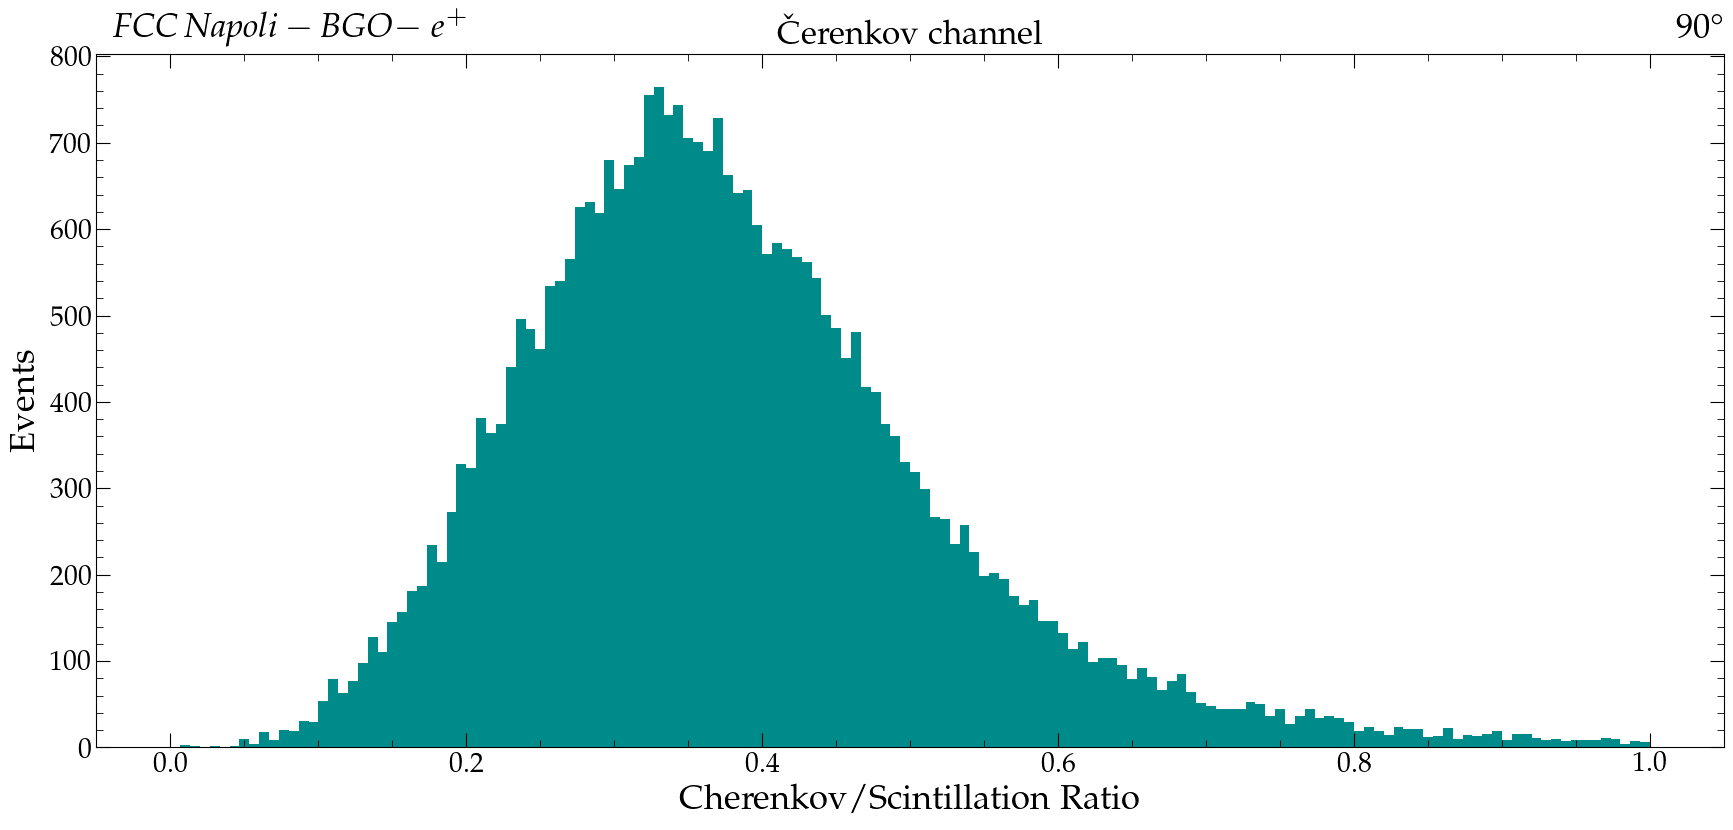

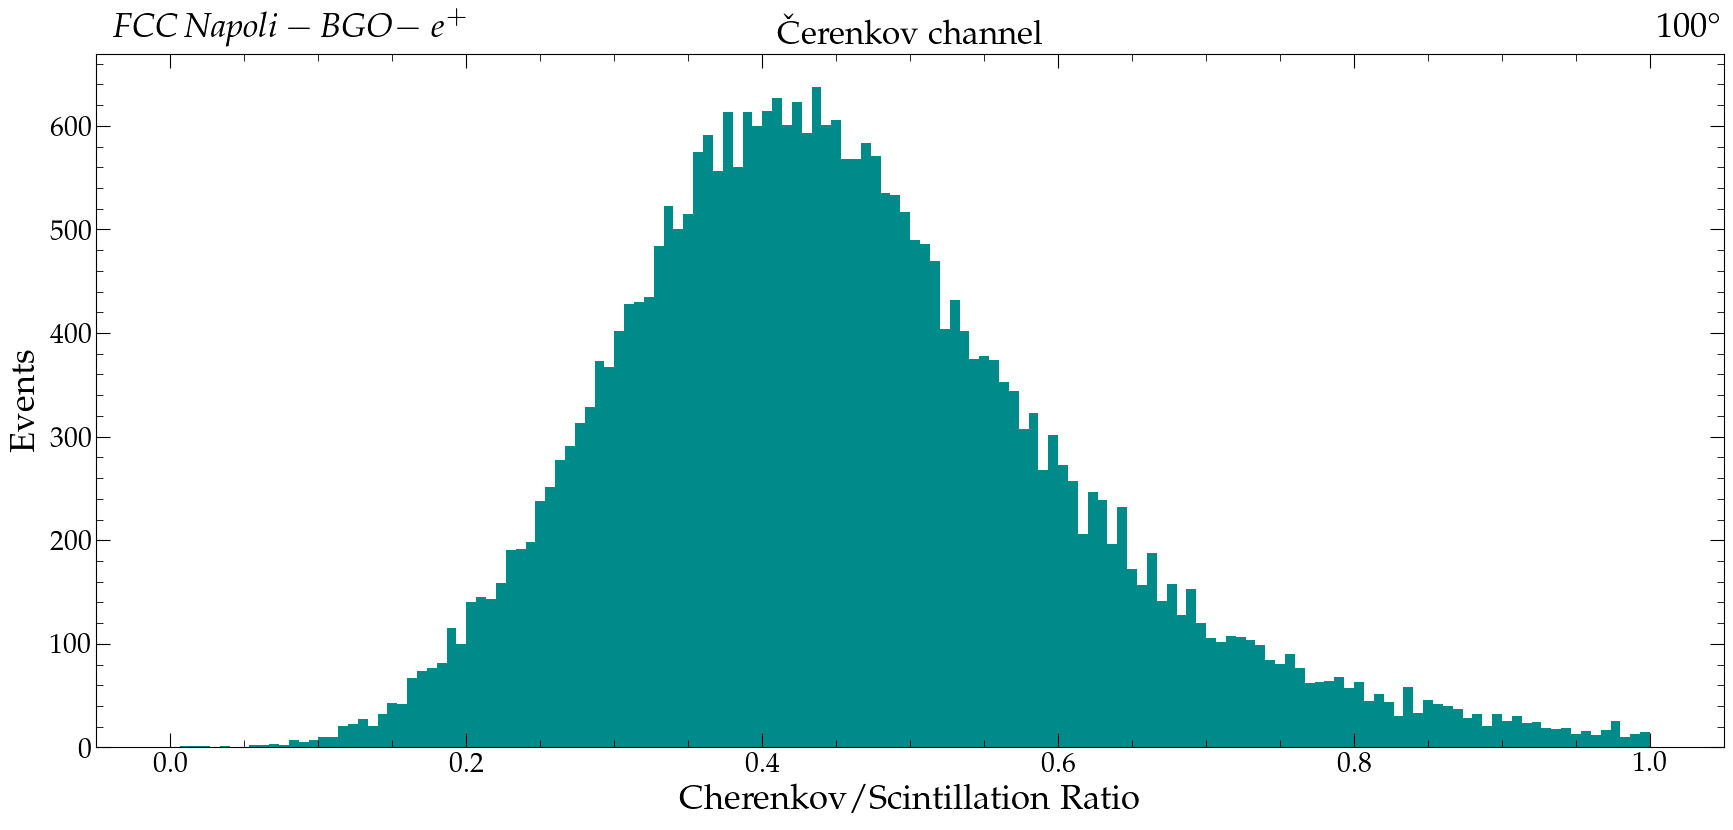

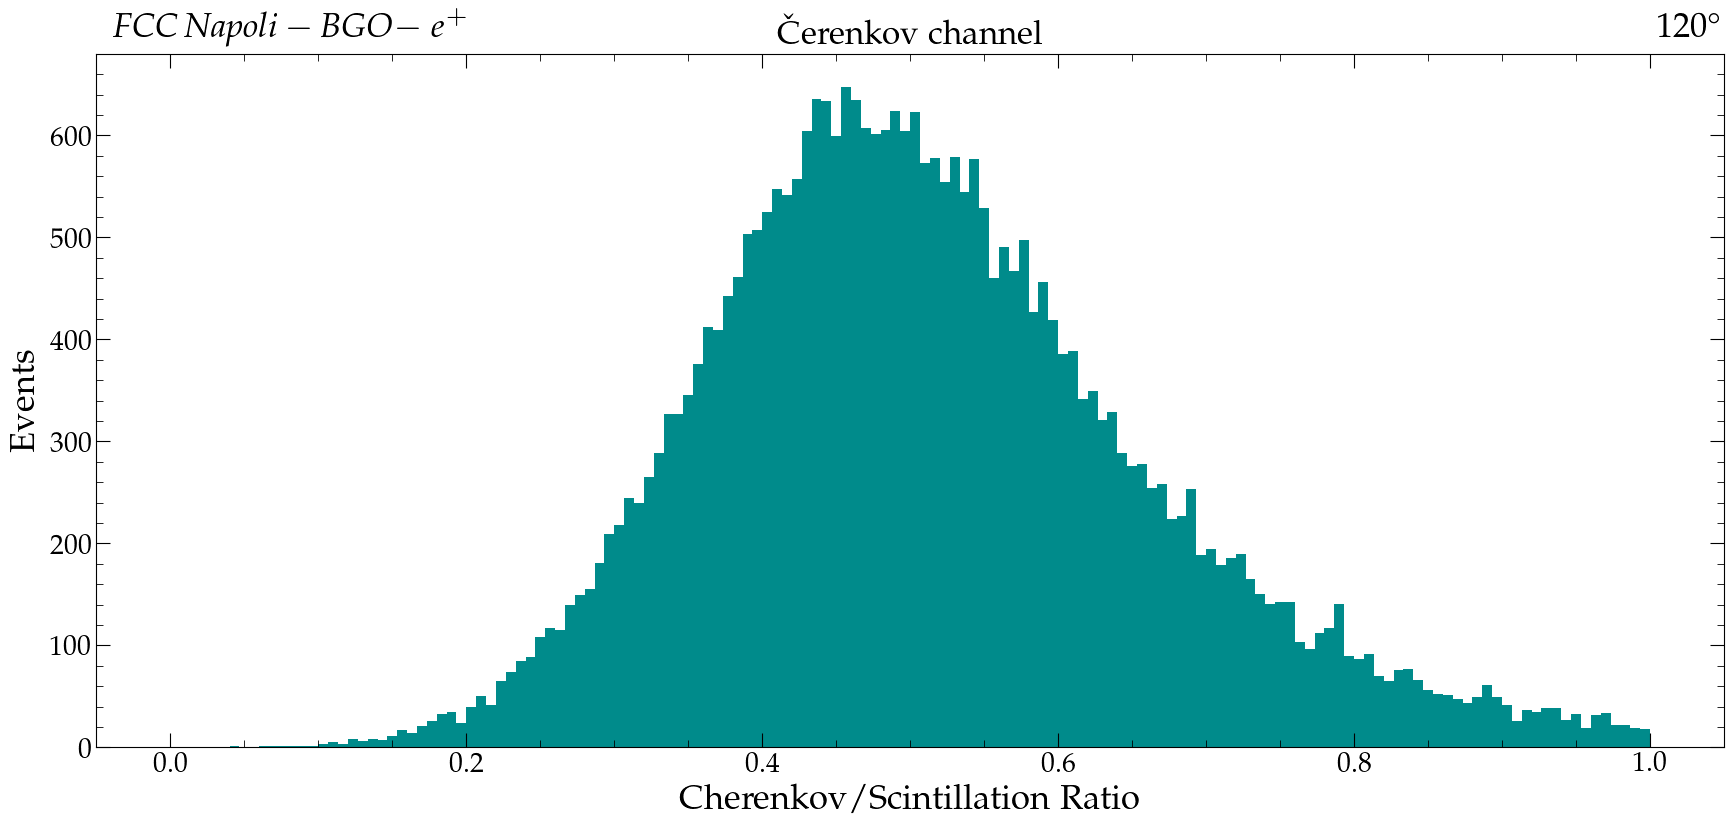

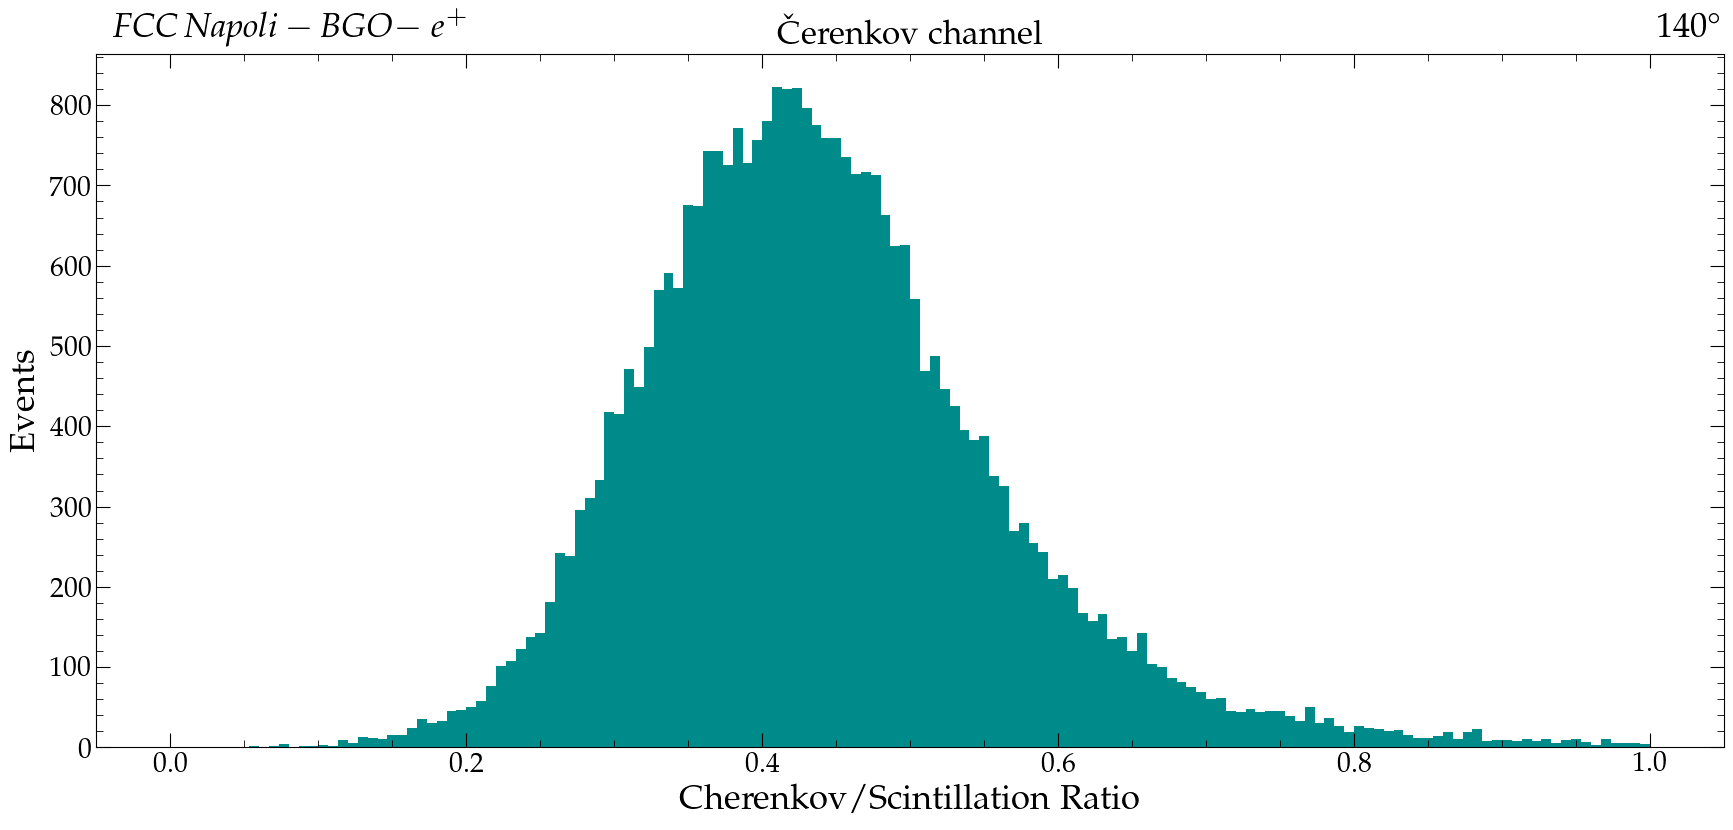

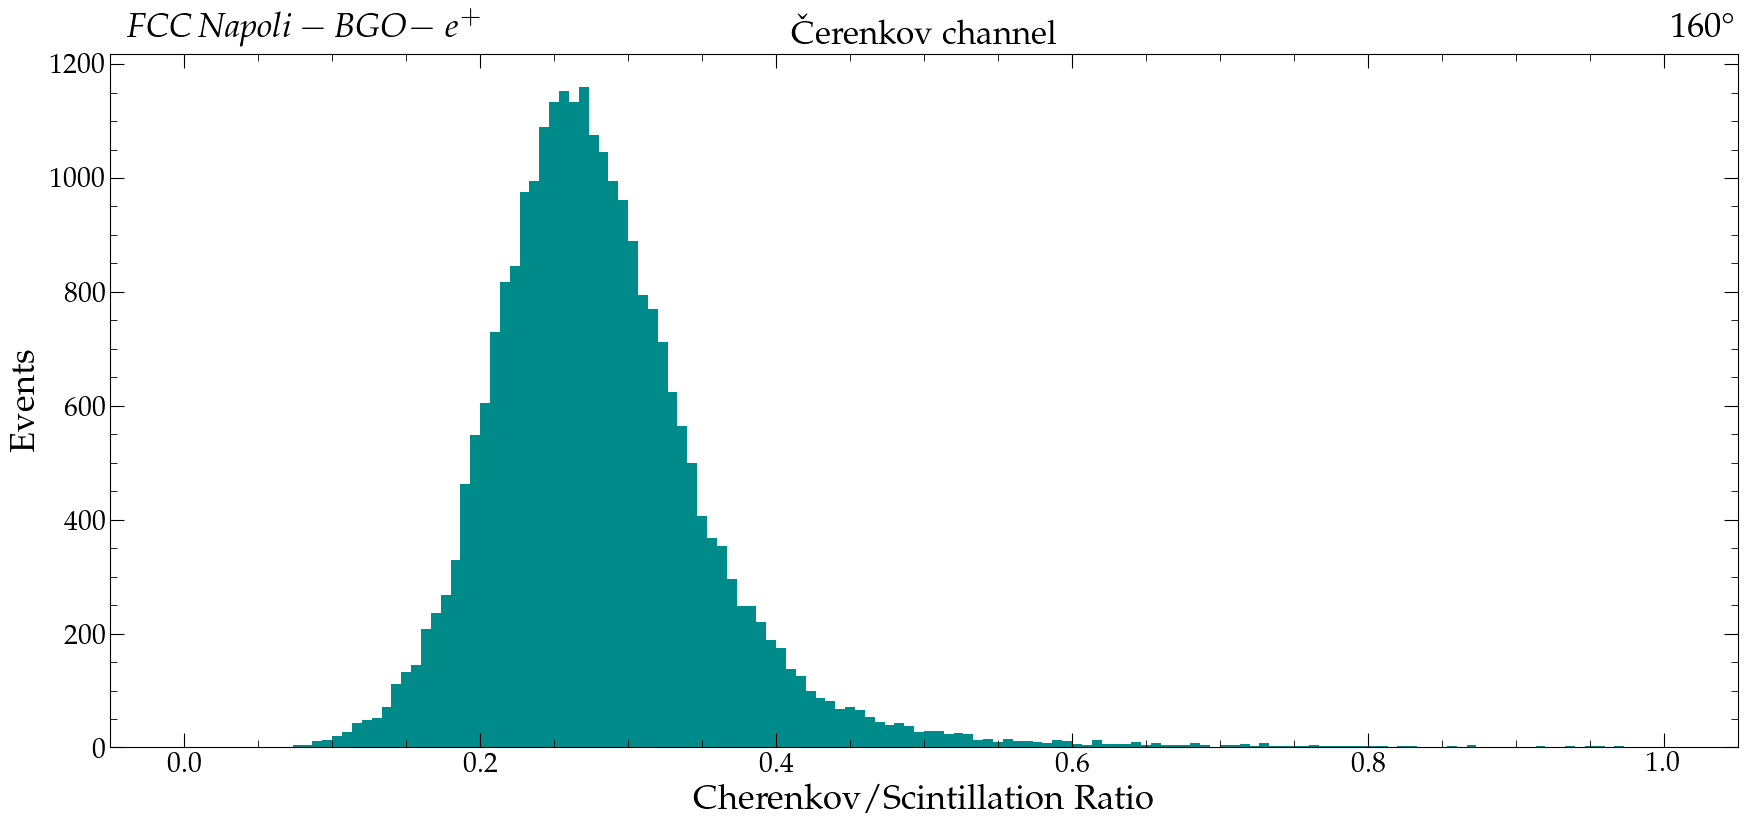

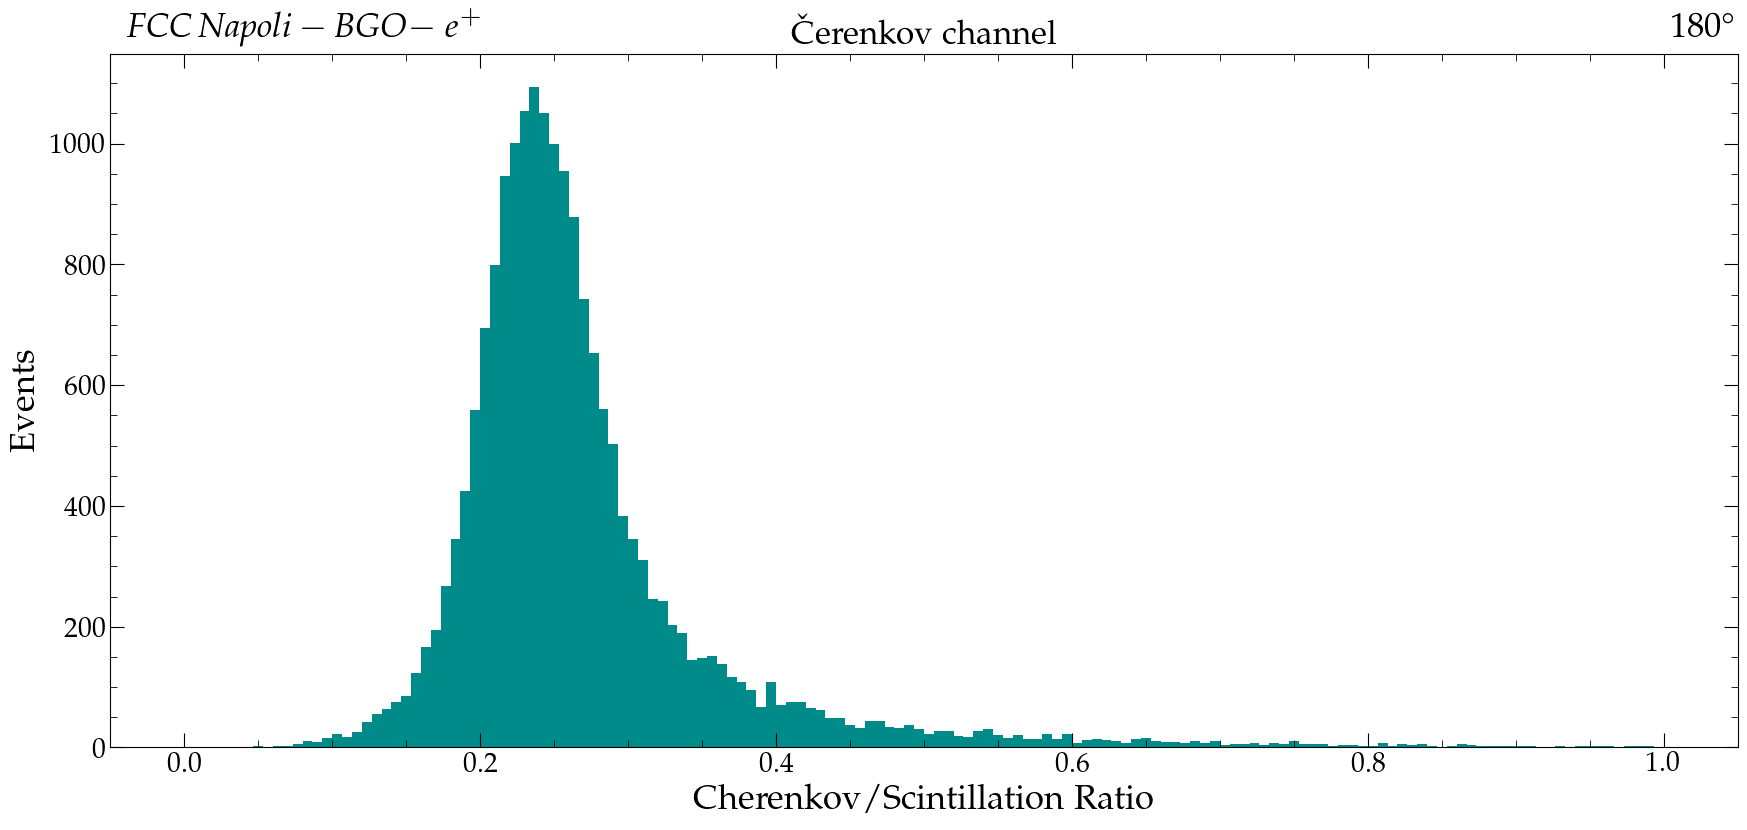

In [12]:
for ch in [2]:
    images = []
    for angle in df[ch].keys():
        title = "Scintillation Channel" if ch == 1 else "Čerenkov channel"
        custom_plot_layout(title=title, xlabel="Cherenkov/Scintillation Ratio", ylabel="Events",  figsize=(21, 9), angle = angle, crystal = crystal, beam = beam_text)
        plt.hist(df[ch][angle]['c'] / df[ch][angle]['s'], range = (0, 1), bins = 150, color = 'darkcyan')
        plt.draw()
        fig = plt.gcf()
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        images.append(Image.fromarray(image))
        plt.savefig(f'Hardware_Fit/figures/more_figures/{angle}_c_over_s_{ch}.png', dpi = 300)
        #plt.close(fig)
    #images[0].save(f'Hardware_Fit/figures/angle_scan_c_over_s_Ch{ch}.gif', save_all=True, append_images=images[1:], duration=500, loop=1)

In [14]:
for ch in [2]:
    images = []
    for angle in df[ch].keys():
        title = "Scintillation Channel" if ch == 1 else "Čerenkov channel"
        custom_plot_layout(title=f'Laser template - Channel {ch}', xlabel="Čerenkov Yield [p.e.]", ylabel="Events",  figsize=(21, 9), angle = angle, crystal = crystal, beam = beam_text)
        plt.hist(df[ch][angle]['c'], range = (0, 1000), bins = 500, color = 'darkcyan')
        plt.draw()
        fig = plt.gcf()
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        images.append(Image.fromarray(image))
        plt.tight_layout()
        plt.savefig(f'Hardware_Fit/figures/more_figures/Laser_{angle}_c_Ch{ch}.png', dpi = 300)
        plt.close(fig)
    #images[0].save(f'Hardware_Fit/figures/Laser_angle_scan_c_Ch{ch}.gif', save_all=True, append_images=images[1:], duration=500, loop=1)

/tmp/ggaudino/ipykernel_3762614/334629433.py:10: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
/tmp/ggaudino/ipykernel_3762614/334629433.py:10: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
/tmp/ggaudino/ipykernel_3762614/334629433.py:10: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


In [15]:
for ch in [2]:
    images = []
    for angle in df[ch].keys():
        title = "Scintillation Channel" if ch == 1 else "Čerenkov channel"
        custom_plot_layout(title=f'Laser template - Channel {ch}', xlabel="Scintillation Yield [p.e.]", ylabel="Events",  figsize=(21, 9), angle = angle, crystal = crystal, beam = beam_text)
        plt.hist(df[ch][angle]['s'], range = (0, 1000), bins = 500, color = 'darkcyan')
        plt.draw()
        fig = plt.gcf()
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        images.append(Image.fromarray(image))
        plt.tight_layout()
        plt.savefig(f'Hardware_Fit/figures/more_figures/Laser_{angle}_s_Ch{ch}.png', dpi = 300)
        plt.close(fig)
    #images[0].save(f'Hardware_Fit/figures/Laser_angle_scan_c_Ch{ch}.gif', save_all=True, append_images=images[1:], duration=500, loop=1)

/tmp/ggaudino/ipykernel_3762614/2643705153.py:10: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
/tmp/ggaudino/ipykernel_3762614/2643705153.py:10: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
/tmp/ggaudino/ipykernel_3762614/2643705153.py:10: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


In [22]:
images = []
for angle in angles: 
    custom_plot_layout(title="", xlabel=r"$\chi^2$ values", ylabel="Events",  figsize=(21, 9), angle = angle, crystal = crystal, beam = beam_text)
    plt.hist(df[angle]['chi2'], range= (0, 5000000), bins = 200,  color = 'royalblue')
    plt.draw()
    fig = plt.gcf()
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(Image.fromarray(image))
    plt.savefig(f'Hardware_Fit/figures/more_figures/{angle}_chi2.png', dpi = 300)
    plt.close(fig)
images[0].save('Hardware_Fit/figures/angle_scan_chi2_yield.gif', save_all=True, append_images=images[1:], duration=500, loop=1)

/tmp/ggaudino/ipykernel_1568385/882182727.py:8: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


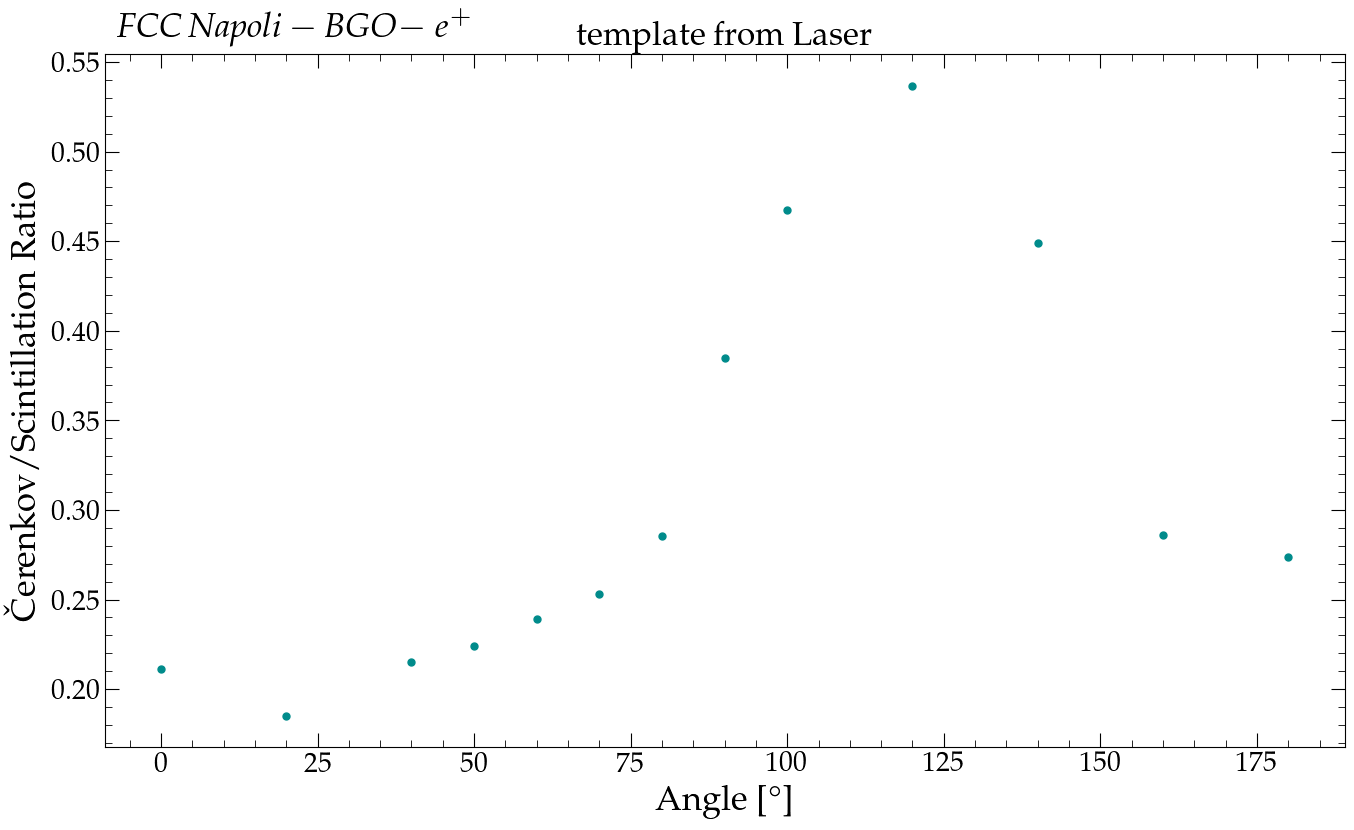

In [16]:
for ch in [2]:
    title = "Scintillation Channel" if ch == 1 else "Čerenkov channel"
    custom_plot_layout(title='template from Laser', ylabel="Čerenkov/Scintillation Ratio", xlabel="Angle [°]",  figsize=(16, 9), crystal = crystal, beam = beam_text)
    for angle in df[ch].keys():
        plt.errorbar(angle, np.mean(df[ch][angle]['c']/df[ch][angle]['s']), marker='o', color = 'darkcyan')
    plt.savefig(f'Hardware_Fit/figures/Angle_scan_LaserTemplate_{ch}_{beam}.png', dpi = 300)

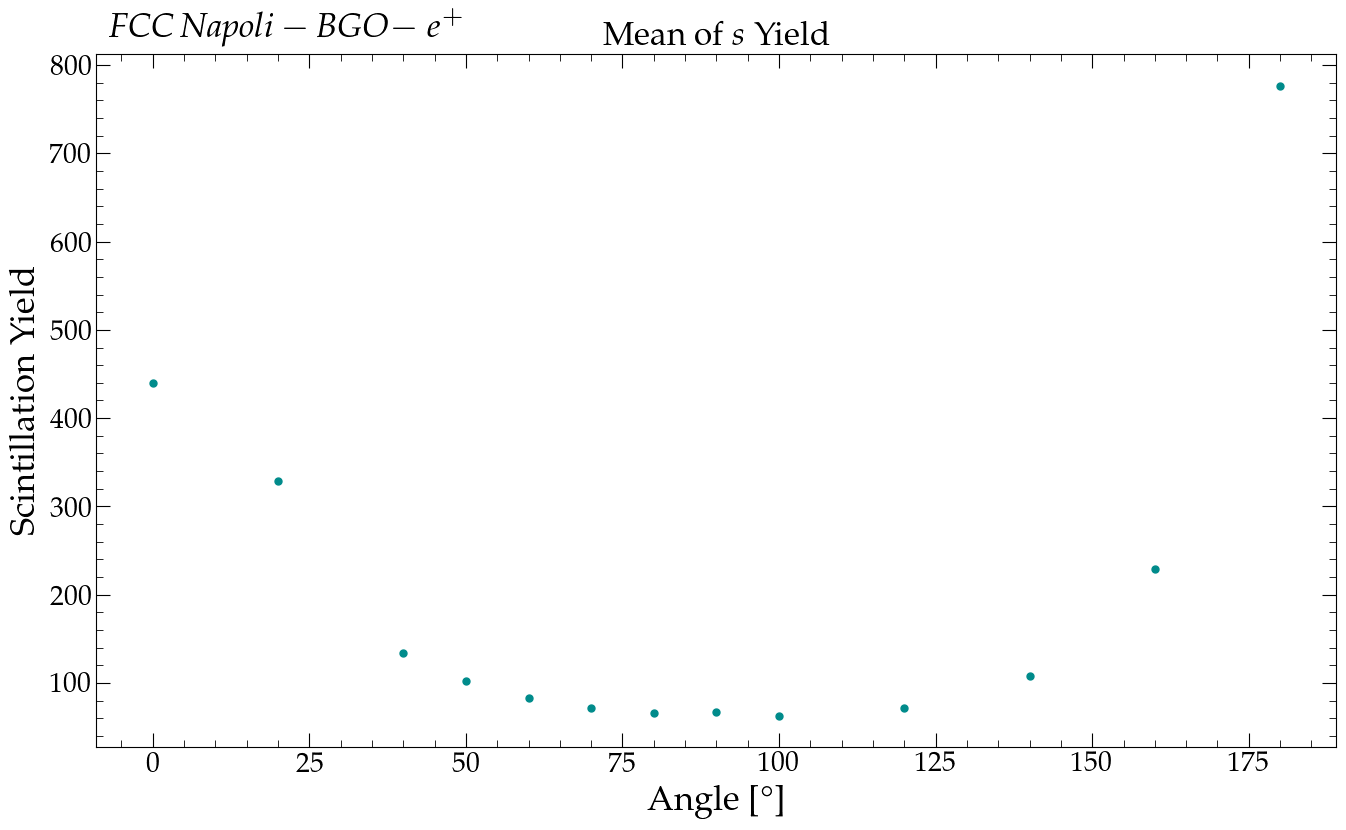

In [19]:
for ch in [2]:
    title = "Scintillation Channel" if ch == 1 else "Čerenkov channel"
    custom_plot_layout(title=r'Mean of $s$ Yield', ylabel="Scintillation Yield", xlabel="Angle [°]",  figsize=(16, 9), crystal = crystal, beam = beam_text)
    for angle in df[ch].keys():
        plt.errorbar(angle, np.mean(df[ch][angle]['s']), marker='o', color = 'darkcyan')
    plt.savefig(f'Hardware_Fit/figures/Angle_scan_means_LaserTemplate_{ch}_{beam}.png', dpi = 300)

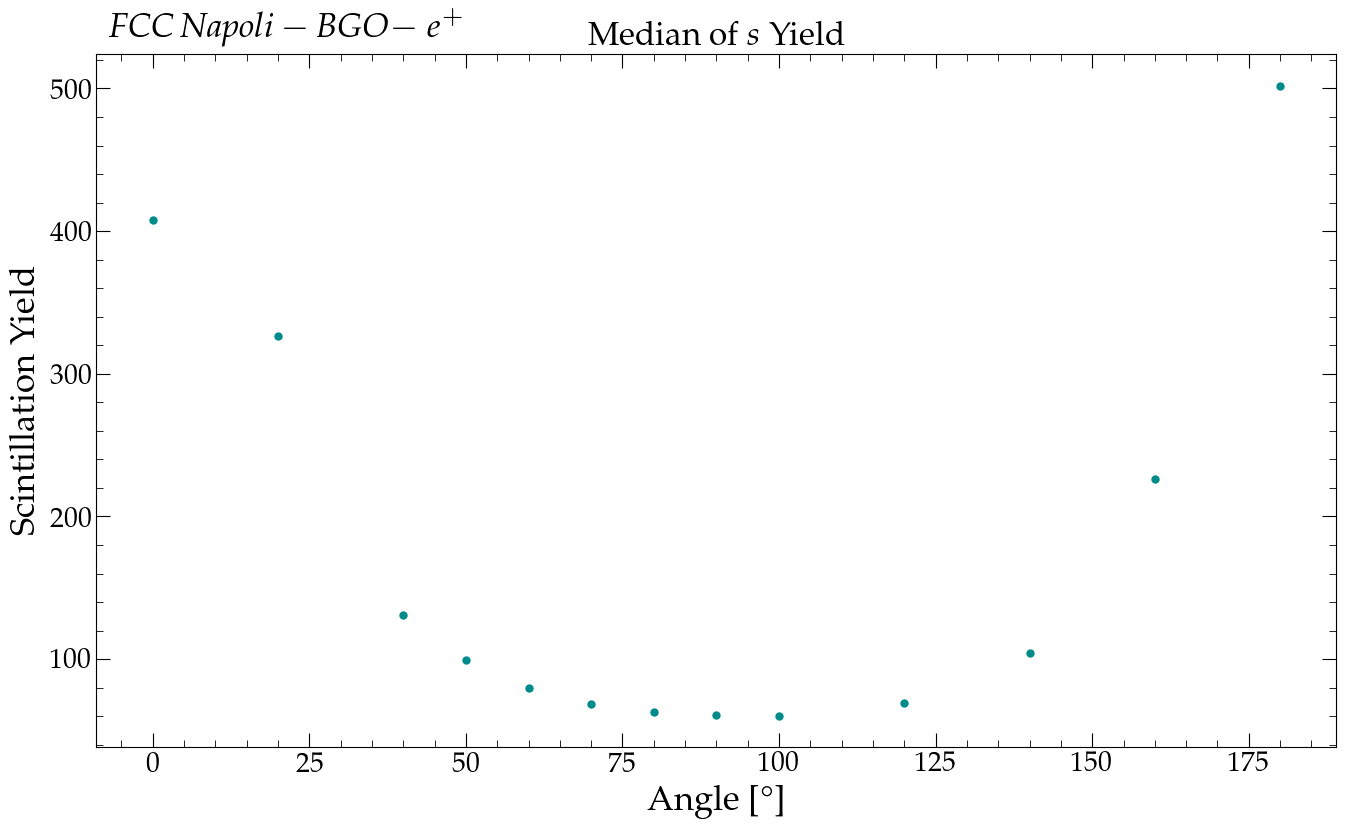

In [20]:
for ch in [2]:
    title = "Scintillation Channel" if ch == 1 else "Čerenkov channel"
    custom_plot_layout(title=r'Median of $s$ Yield', ylabel="Scintillation Yield", xlabel="Angle [°]",  figsize=(16, 9), crystal = crystal, beam = beam_text)
    for angle in df[ch].keys():
        plt.errorbar(angle, np.median(df[ch][angle]['s']), marker='o', color = 'darkcyan')
    plt.savefig(f'Hardware_Fit/figures/Angle_scan_medians_LaserTemplate_{ch}_{beam}.png', dpi = 300)

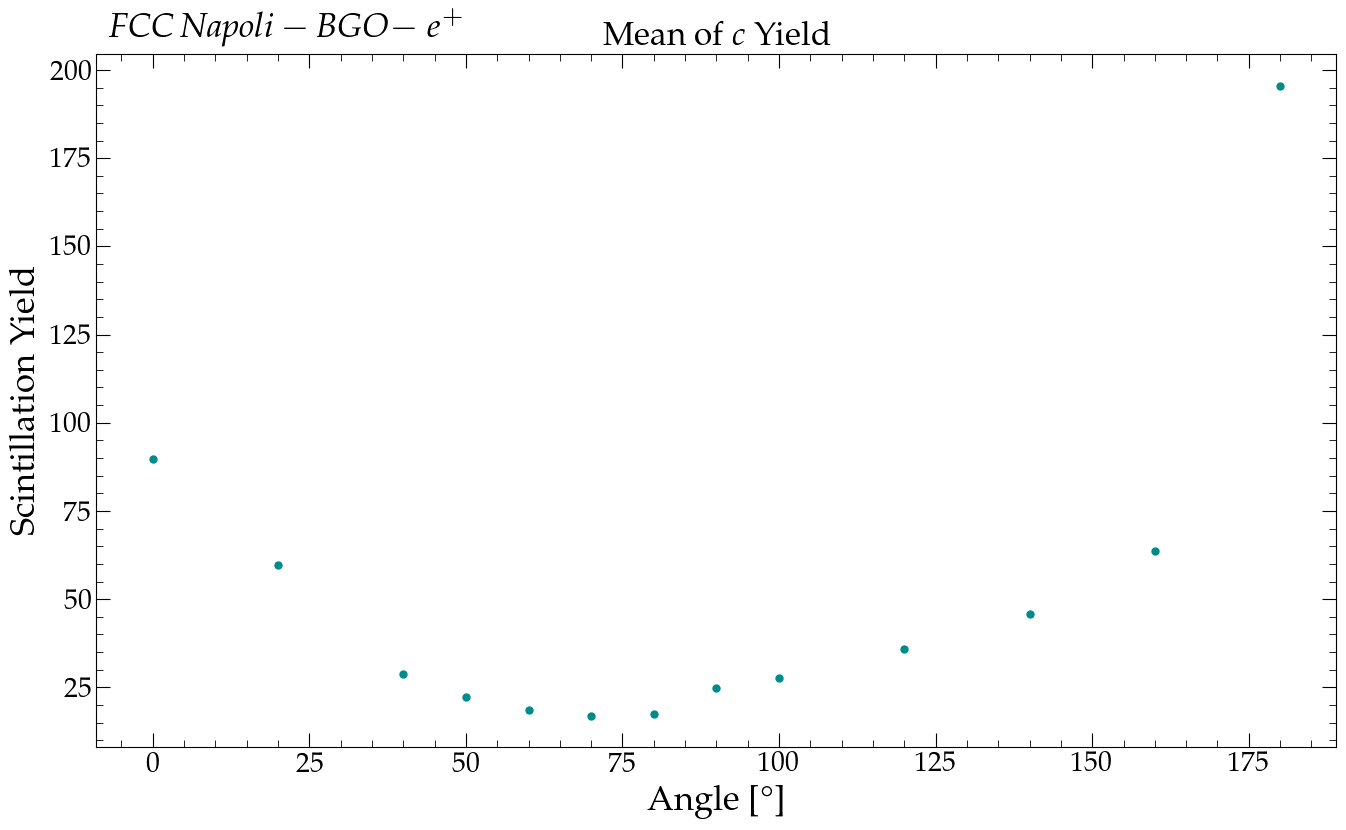

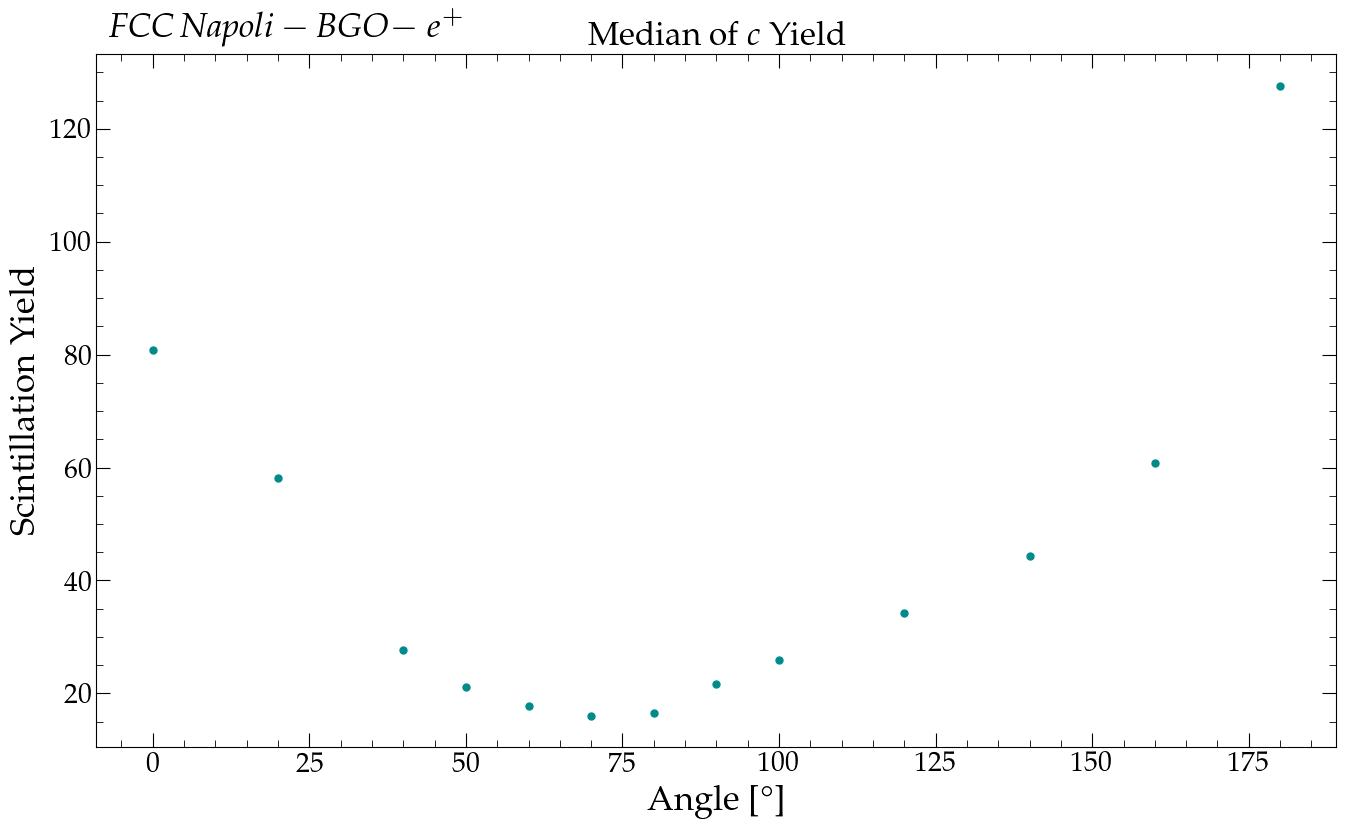

In [21]:
for ch in [2]:
    title = "Scintillation Channel" if ch == 1 else "Čerenkov channel"
    custom_plot_layout(title=r'Mean of $c$ Yield', ylabel="Scintillation Yield", xlabel="Angle [°]",  figsize=(16, 9), crystal = crystal, beam = beam_text)
    for angle in df[ch].keys():
        plt.errorbar(angle, np.mean(df[ch][angle]['c']), marker='o', color = 'darkcyan')
    plt.savefig(f'Hardware_Fit/figures/Angle_scan_meanc_LaserTemplate_{ch}_{beam}.png', dpi = 300)
for ch in [2]:
    title = "Scintillation Channel" if ch == 1 else "Čerenkov channel"
    custom_plot_layout(title=r'Median of $c$ Yield', ylabel="Scintillation Yield", xlabel="Angle [°]",  figsize=(16, 9), crystal = crystal, beam = beam_text)
    for angle in df[ch].keys():
        plt.errorbar(angle, np.median(df[ch][angle]['c']), marker='o', color = 'darkcyan')
    plt.savefig(f'Hardware_Fit/figures/Angle_scan_medianc_LaserTemplate_{ch}_{beam}.png', dpi = 300)

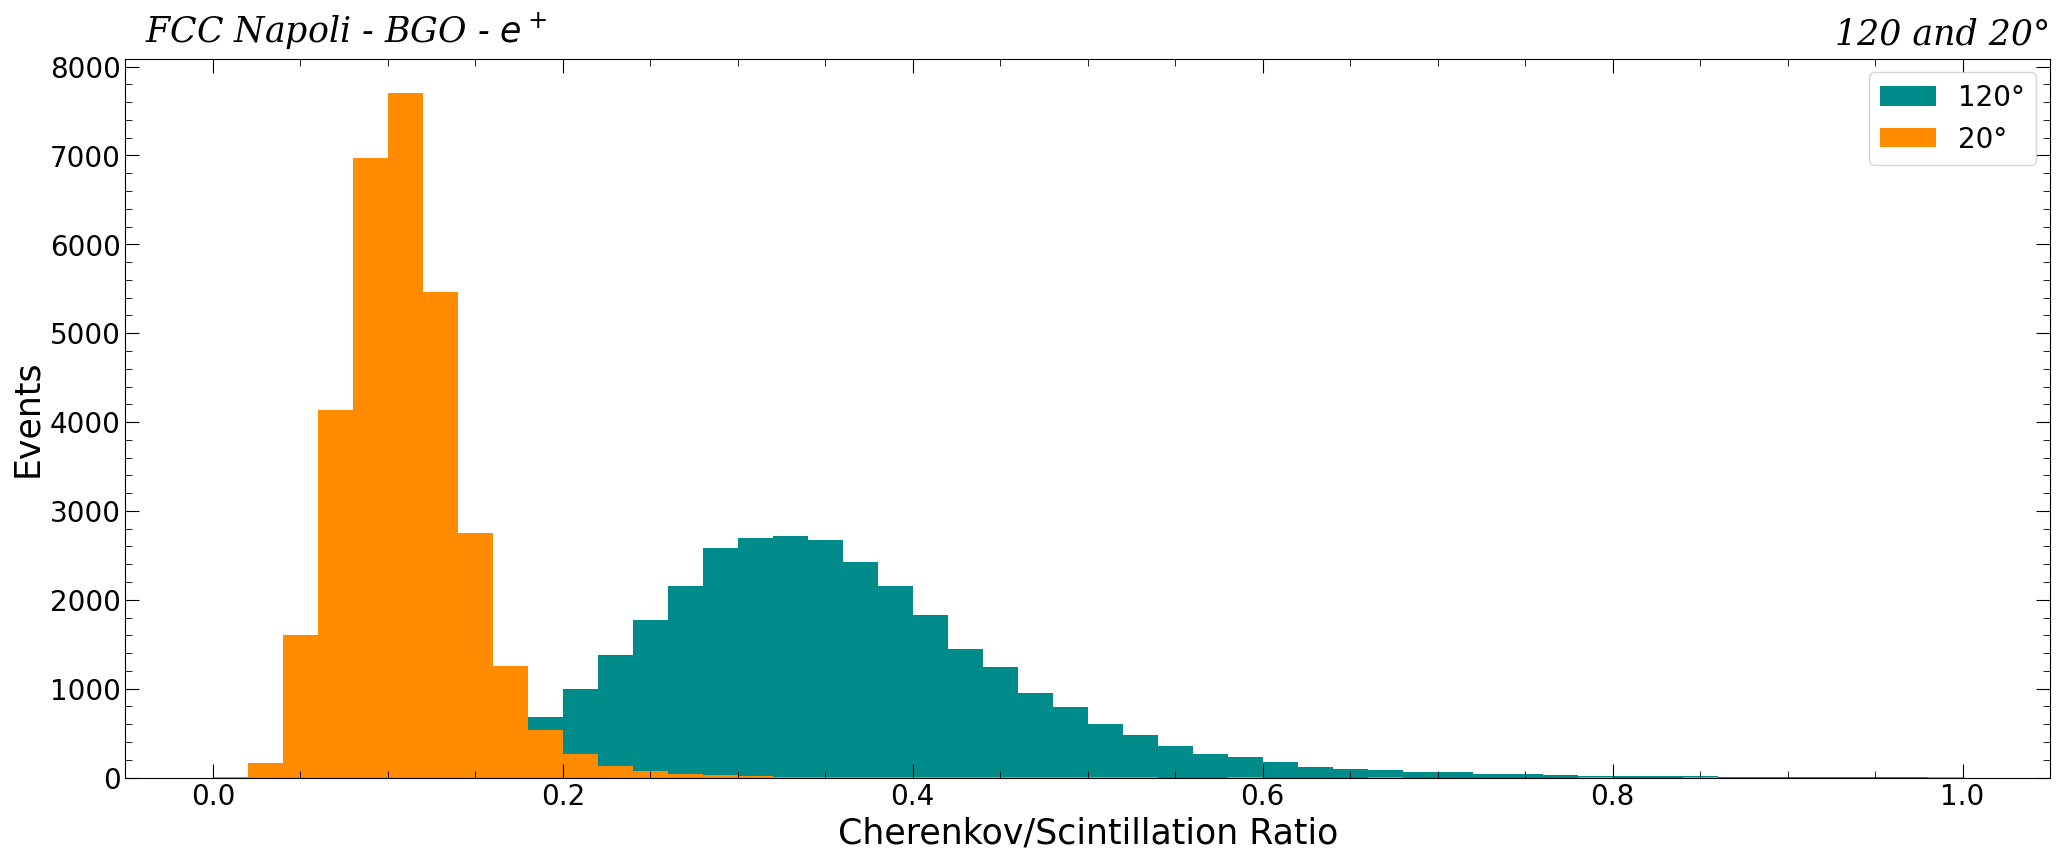

In [21]:
custom_plot_layout(title="", xlabel="Cherenkov/Scintillation Ratio", ylabel="Events",  figsize=(21, 9), angle = '120 and 20', crystal = crystal, beam = beam_text)
plt.hist(df[120]['c_over_s'], range = (0, 1), bins = 50, color = 'darkcyan', label = '120°')
plt.hist(df[20]['c_over_s'], range = (0, 1), bins = 50, color = 'darkorange', label = '20°')
plt.legend()
plt.tight_layout()
plt.savefig('Hardware_Fit/figures/angle_scan_max_min.png', dpi = 300)

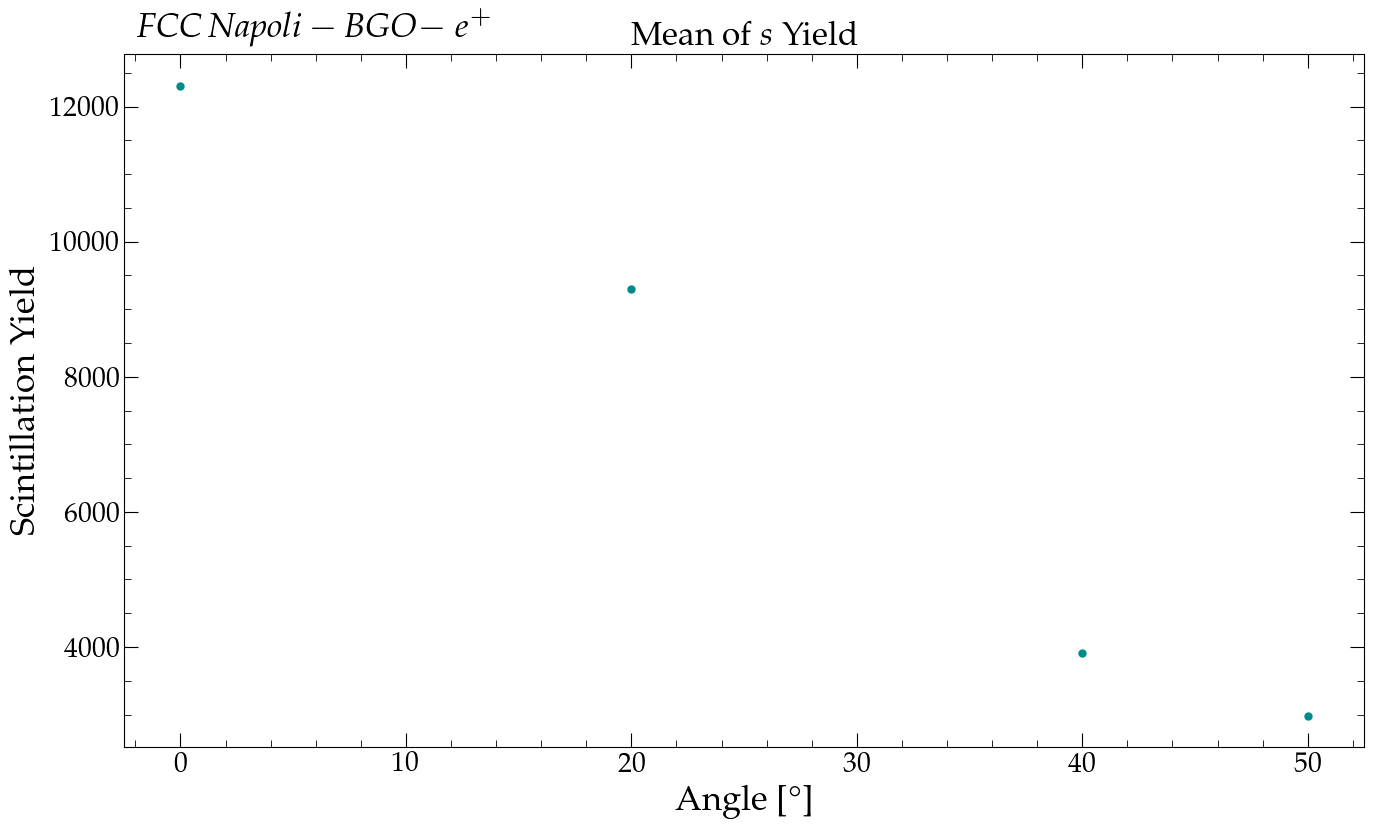

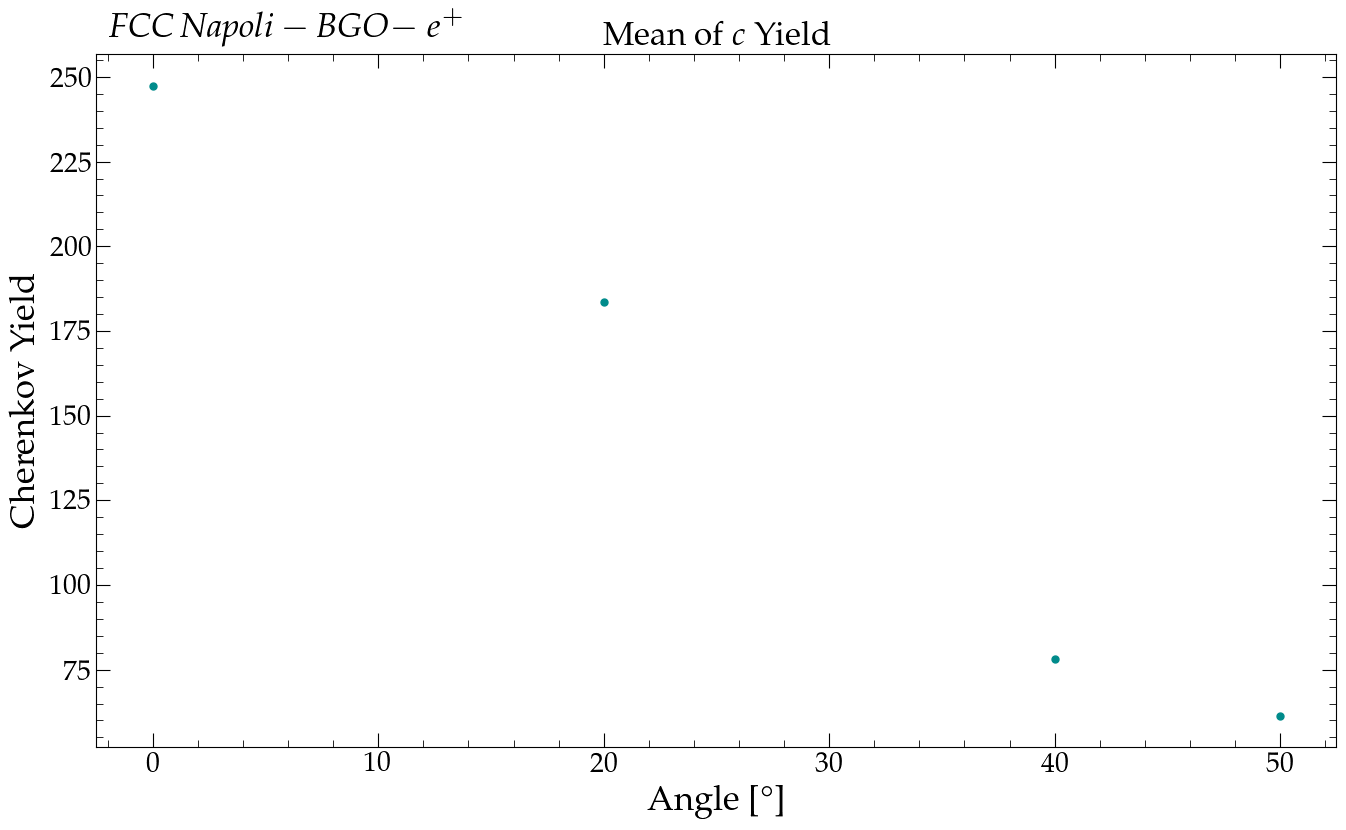

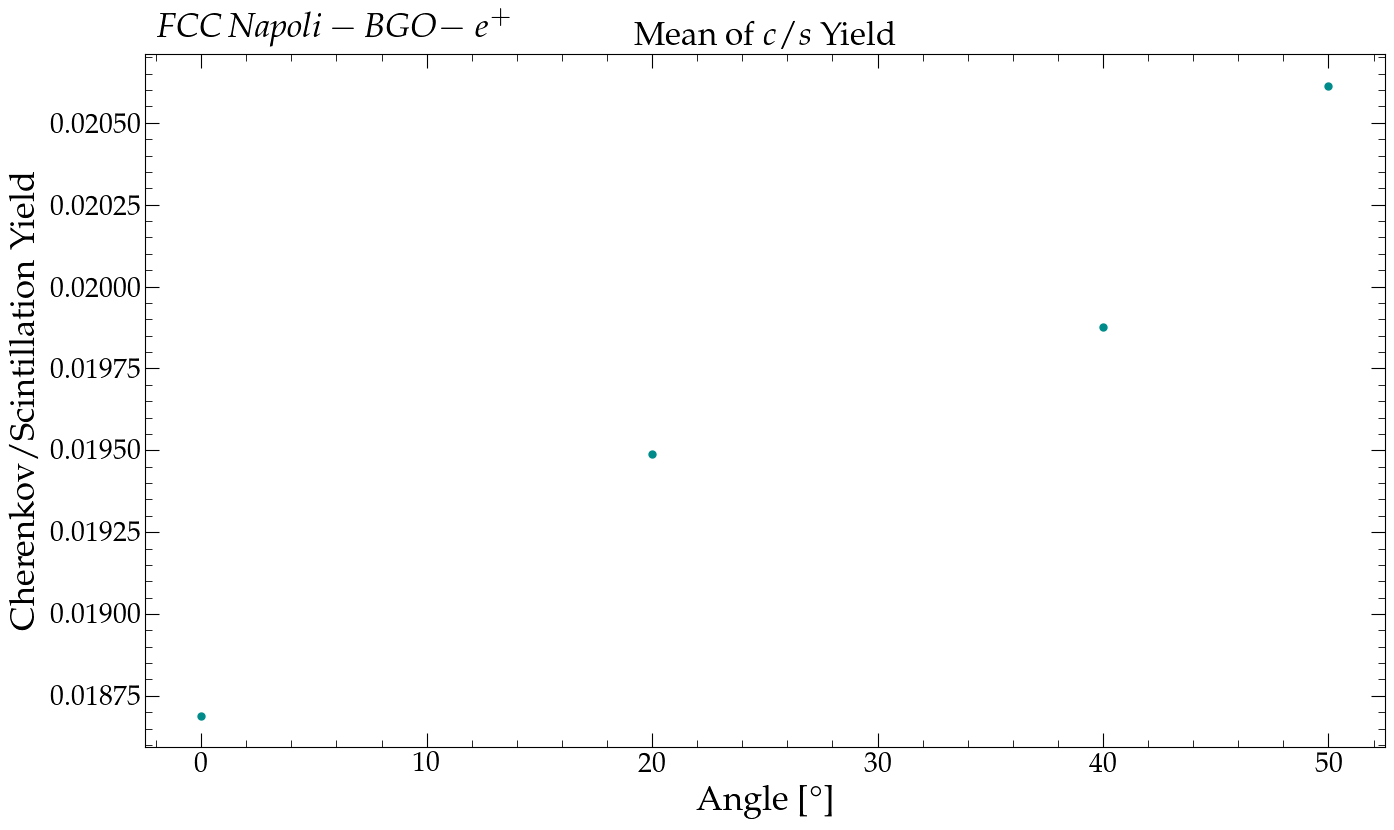

In [33]:
for ch in [1]:
    title = "Scintillation Channel" if ch == 1 else "Čerenkov channel"
    custom_plot_layout(title=r'Mean of $s$ Yield', ylabel="Scintillation Yield", xlabel="Angle [°]",  figsize=(16, 9), crystal = crystal, beam = beam_text)
    for angle in [0, 20, 40, 50]:
        plt.errorbar(angle, np.mean(df[ch][angle]['s']), marker='o', color = 'darkcyan')
    custom_plot_layout(title=r'Mean of $c$ Yield', ylabel="Cherenkov Yield", xlabel="Angle [°]",  figsize=(16, 9), crystal = crystal, beam = beam_text)
    for angle in [0, 20, 40, 50]:
        plt.errorbar(angle, np.mean(df[ch][angle]['c']), marker='o', color = 'darkcyan')
    custom_plot_layout(title=r'Mean of $c/s$ Yield', ylabel="Cherenkov/Scintillation Yield", xlabel="Angle [°]",  figsize=(16, 9), crystal = crystal, beam = beam_text)
    for angle in [0, 20, 40, 50]:
        plt.errorbar(angle, np.mean(df[ch][angle]['c']/df[ch][angle]['s']), marker='o', color = 'darkcyan')